In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_frame = pd.read_csv("../Datasets/1-studyhours.csv")
data_frame.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [4]:
data_frame.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


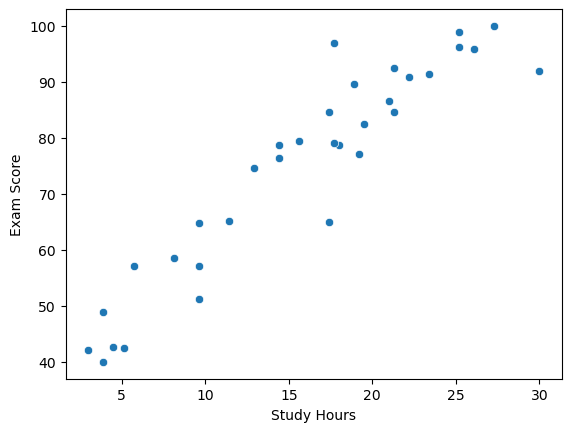

In [52]:
sns.scatterplot(x=data_frame["Study Hours"],y=data_frame["Exam Score"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

In [6]:
X = data_frame[["Study Hours"]] # x data frame olmalı bu nedenle iki parantez kullanırız
y = data_frame["Exam Score"]

In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=15,test_size=0.2)

In [8]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(26, 7, 26, 7)

In [9]:
from sklearn.preprocessing import StandardScaler # verileri daha kıyaslanabilir aralıklara standartlaştırır

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # sadece transform yaparız çünkü model test verilerine aşina olmamalı

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

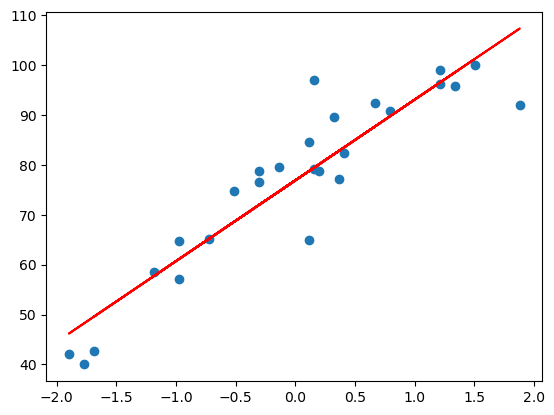

In [13]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),c="r") # best fit line
plt.show()

In [14]:
regression.predict(scaler.transform([[20]]))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [15]:
y_pred_test = regression.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [17]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
r2 = r2_score(y_test,y_pred_test)
print("mse: ",mse)
print("mae: ",mae)
print("r2 score: %" ,r2*100)

mse:  29.45839048833392
mae:  4.054868128856142
r2 score: % 91.96596206825491


In [18]:
y_pred_test,y_test

(array([50.95139904, 86.97131054, 92.40827832, 52.31064098, 61.14571361,
        48.23291515, 87.65093152]),
 25    42.4
 14    86.6
 30    91.5
 16    57.2
 24    51.2
 20    49.0
 19    84.7
 Name: Exam Score, dtype: float64)

In [19]:
# Multiple Lineer Regression

In [23]:
df = pd.read_csv("../Datasets/2-multiplegradesdataset.csv")
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [24]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


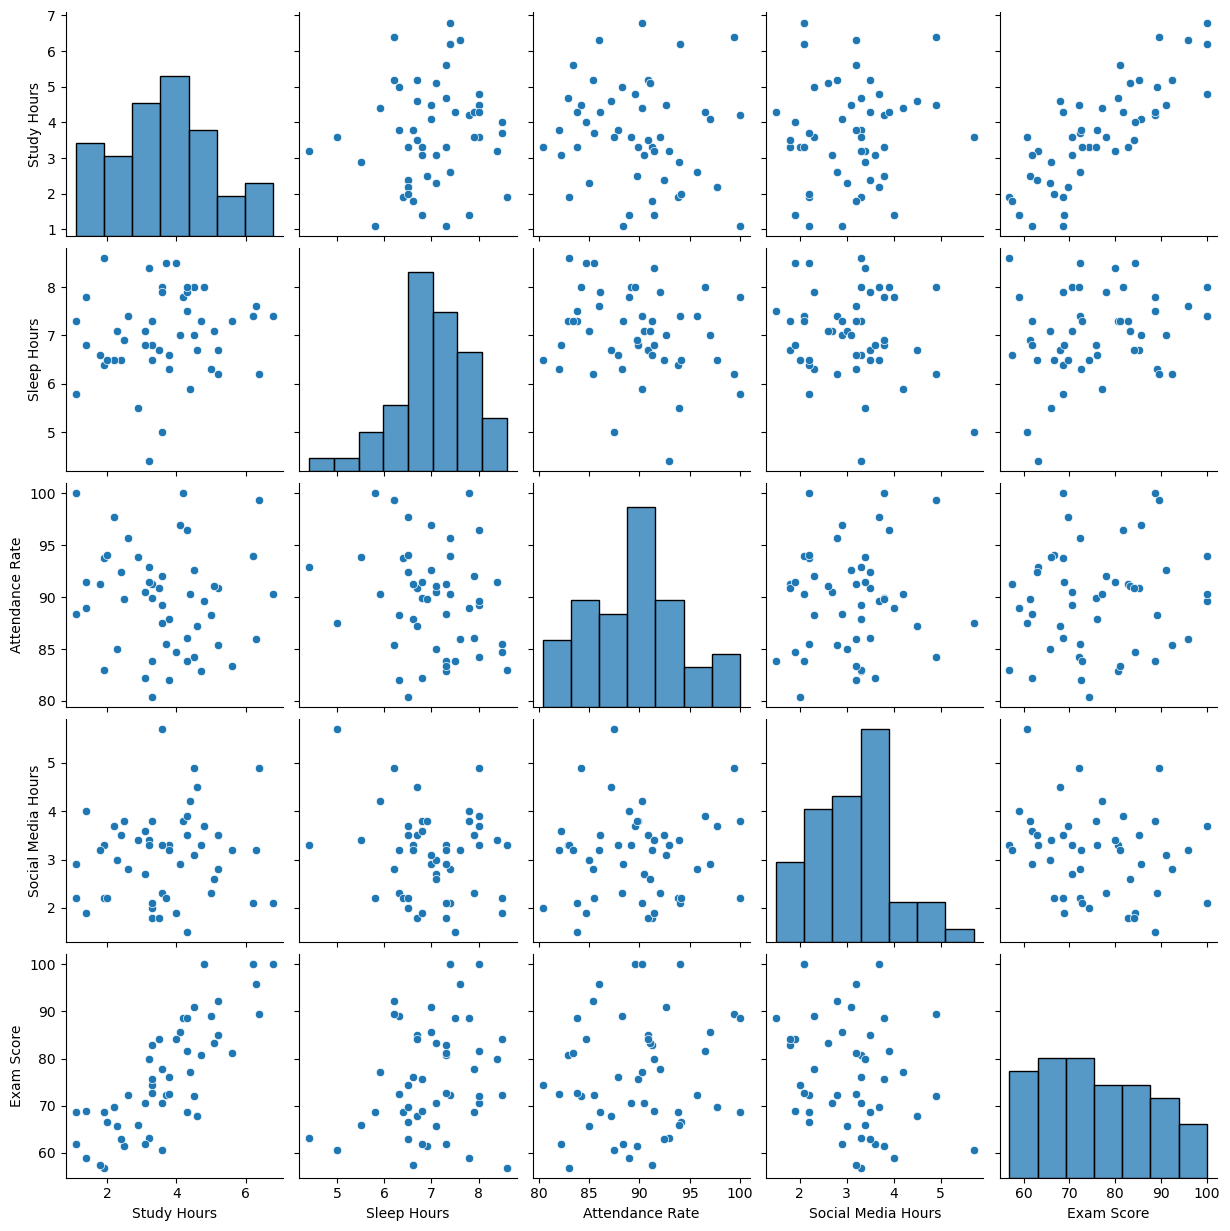

In [25]:
sns.pairplot(df)
plt.show()

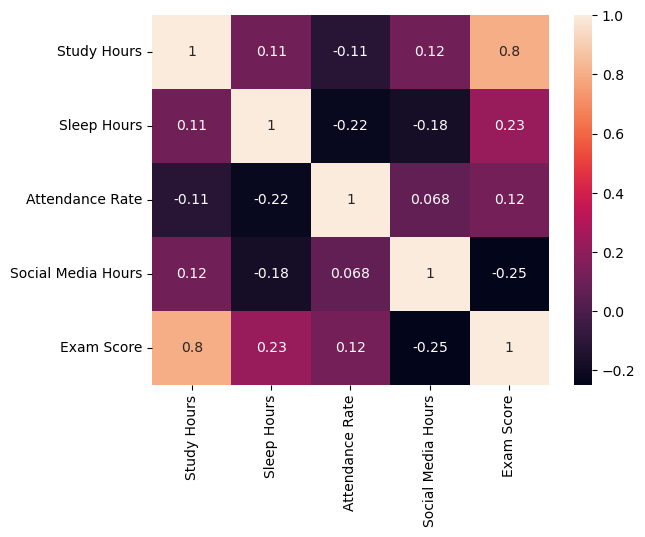

In [26]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [27]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [35]:
X = df[["Study Hours","Sleep Hours","Attendance Rate","Social Media Hours"]]
y = df["Exam Score"]
X.head(),y.head()

(   Study Hours  Sleep Hours  Attendance Rate  Social Media Hours
 0          4.7          7.3             82.9                 3.3
 1          3.8          6.6             87.9                 3.3
 2          5.0          6.3             88.3                 2.3
 3          6.3          7.6             86.0                 3.2
 4          3.6          8.0             89.2                 3.3,
 0    80.7
 1    76.0
 2    89.1
 3    95.9
 4    70.5
 Name: Exam Score, dtype: float64)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [40]:
new_student = [[5,7,90,8]]
new_student = scaler.transform(new_student)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
regression.predict(new_student)

array([64.9345521])

In [42]:
y_pred = regression.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [44]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MSE:{mse:.3f},MAE:{mae:.3f},R2:{r2:.3f}")

MSE:14.601,MAE:3.277,R2:0.916


In [45]:
#adjusted score
1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8735061018659063

In [46]:
regression.intercept_ #bias

77.41081081081082

In [47]:
regression.coef_ # weight

array([ 9.28014703,  1.78967062,  3.24340001, -4.08127695])